In [2]:
import spacy
from spacy import displacy
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import bigrams
from nltk import word_tokenize, pos_tag, ne_chunk
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt
from date_spacy import find_dates
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cabro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cabro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cabro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\cabro\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\cabro\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\cabro\AppData\Roaming\nltk_data...
[nltk_data]  

True

Exercice 1 : Segmentation de texte

Partie 1 :

In [3]:
nlp = spacy.load("fr_core_news_sm")
nlp.add_pipe("find_dates")    #Ajout de find_date à la pipeline du npl
text = "Marco est plus beau que Corentin le 2 Octobre 2015 et Pierre a bu plus que Matthieu qui pourrait être le père de Lucas à Chef-Lieu."
doc = nlp(text)
Dates=[]
Noms=[]
for sent in doc.ents:      #On boucle sur toutes les entités
    if sent.label_ == 'DATE':    #Si c'est une date, alors on la met dans la liste "Dates"
        Dates.append(sent.text)
    else:                       #Sinon, c'est un nom propre et on la met alors dans "Noms"
        Noms.append(sent.text)
print(f"Dates : {Dates} \nNoms : {Noms}")

Dates : ['2 Octobre 2015'] 
Noms : ['Marco', 'Corentin', 'Pierre', 'Matthieu', 'Lucas', 'Chef-Lieu']


Partie 2 :

In [4]:
nlp_fr = spacy.load("fr_core_news_sm")   #On récupère un modèle français
nlp_en = spacy.load("en_core_web_sm")    #On récupère un modèle anglais
text = "I returned by the boulevards on the starboard side, avoiding contact with the swaying pulleys and the ropes of the rigging, lashed in all directions by the wind; now keeping out of the way, here of the blows of a fly-wheel crane, and further on, of the flaming scoria which were showering from a forge like a display of feux d'artifice. I could hardly see the tops of the masts, à 200 mètres de hauteur, which lost themselves in the mist, augmentant la fumée noire venant des tenders and colliers."
doc_fr = nlp_fr(text)
doc_en = nlp_en(text)
for sent in doc_fr.sents:                           #On boucle sur chacun des modèles pour séquencer par phrase
    print(f"\nPhrases avec français : {sent.text}")
for sent in doc_en.sents:
    print(f"\nPhrases avec anglais : {sent.text}")


#Le modèle anglais est donc plus performant que le modèle français


Phrases avec français : I

Phrases avec français : returned by the boulevards on the starboard side,

Phrases avec français : avoiding contact with the swaying pulleys and the ropes of the rigging, lashed in all directions by the wind;

Phrases avec français : now keeping out of the way, here of the blows of a fly-wheel crane, and further on, of the flaming scoria

Phrases avec français : which were showering from a forge like a display of feux d'artifice.

Phrases avec français : I

Phrases avec français : could hardly see the tops of the masts, à 200 mètres de hauteur, which lost themselves

Phrases avec français : in the mist, augmentant la fumée noire venant des tenders and colliers.

Phrases avec anglais : I returned by the boulevards on the starboard side, avoiding contact with the swaying pulleys and the ropes of the rigging, lashed in all directions by the wind; now keeping out of the way, here of the blows of a fly-wheel crane, and further on, of the flaming scoria which were

Exercice 2 : Lemmatisation

Partie 1 :

In [5]:
nlp = spacy.load("fr_core_news_sm")
text = "Les conditions ne sont pas réunies pour l'instant pour une entrée de LR au gouvernement, a affirmé le ministre démissionnaire de l'Intérieur, Bruno Retailleau, mercredi 18 décembre, avant de rencontrer François Bayrou à 9h30. Le Premier ministre s'est rendu à l'Elysée à deux reprises, mardi, pour évoquer avec Emmanuel Macron la composition de sa future équipe. J'espère qu'on va réussir à aller vite et finaliser le gouvernement dans quelques jours, a-t-il affirmé en milieu d'après-midi. Le président des députés du MoDem, Marc Fesneau, très proche de François Bayrou, a évoqué, mercredi, sur TF1, des échanges très avancés et le besoin que les équipes puissent se constituer dans les ministères avant Noël. Suivez la journée politique dans notre direct. Le défilé des partis se poursuit à Matignon. François Bayrou poursuit ses consultations des groupes parlementaires, mercredi. Il doit recevoir des représentants du Parti radical à 11 heures et du parti UDR d'Eric Ciotti à midi, avant d'enchaîner sur les sénateurs du groupe macroniste à 14h30 et ceux du groupe centriste RDSE à 15h30.  Le RN agite la menace de la censure. Le vice-président du Rassemblement national Sébastien Chenu a menacé, mercredi, François Bayrou de censure tôt ou tard si ce dernier ne tient pas compte des erreurs qu'a pu commettre Michel Barnier, tant sur la forme que sur le fond dans la confection de son budget. La loi spéciale arrive au Sénat. Le texte budgétaire soumis en urgence après la censure du gouvernement Barnier entre dans sa dernière ligne droite au Parlement, avec un vote sans suspense attendu au Sénat. L'Assemblée nationale l'a adopté à l'unanimité, lundi, et, sauf immense surprise, à partir de 14h30, le Sénat l'approuvera à son tour sans le modifier, ce qui mettra fin à son parcours parlementaire et permettra sa promulgation in extremis avant le 31 décembre. François Bayrou promet de se rendre à Mayotte. Dès l'instant que le président de la République aura quitté [Mayotte], que le gouvernement sera formé, j'irai évidemment pour mobiliser la totalité des moyens de l'Etat, a assuré mardi soir le Premier ministre, critiqué pour avoir présidé lundi soir le conseil municipal de Pau après s'être contenté de suivre en visioconférence une réunion de crise sur Mayotte. Emmanuel Macron est attendu jeudi dans l'archipel."
doc = nlp(text)
L=[]
x=0
for i in doc:
    if not i.is_punct and i.text not in L:   #Boucle sur les tokens pour l'unicité des mots
        x+=1     #Compteur
        L.append(i.text)
print(x)

232


In [6]:
nlp = spacy.load("fr_core_news_sm")
text = "Les conditions ne sont pas réunies pour l'instant pour une entrée de LR au gouvernement, a affirmé le ministre démissionnaire de l'Intérieur, Bruno Retailleau, mercredi 18 décembre, avant de rencontrer François Bayrou à 9h30. Le Premier ministre s'est rendu à l'Elysée à deux reprises, mardi, pour évoquer avec Emmanuel Macron la composition de sa future équipe. J'espère qu'on va réussir à aller vite et finaliser le gouvernement dans quelques jours, a-t-il affirmé en milieu d'après-midi. Le président des députés du MoDem, Marc Fesneau, très proche de François Bayrou, a évoqué, mercredi, sur TF1, des échanges très avancés et le besoin que les équipes puissent se constituer dans les ministères avant Noël. Suivez la journée politique dans notre direct. Le défilé des partis se poursuit à Matignon. François Bayrou poursuit ses consultations des groupes parlementaires, mercredi. Il doit recevoir des représentants du Parti radical à 11 heures et du parti UDR d'Eric Ciotti à midi, avant d'enchaîner sur les sénateurs du groupe macroniste à 14h30 et ceux du groupe centriste RDSE à 15h30.  Le RN agite la menace de la censure. Le vice-président du Rassemblement national Sébastien Chenu a menacé, mercredi, François Bayrou de censure tôt ou tard si ce dernier ne tient pas compte des erreurs qu'a pu commettre Michel Barnier, tant sur la forme que sur le fond dans la confection de son budget. La loi spéciale arrive au Sénat. Le texte budgétaire soumis en urgence après la censure du gouvernement Barnier entre dans sa dernière ligne droite au Parlement, avec un vote sans suspense attendu au Sénat. L'Assemblée nationale l'a adopté à l'unanimité, lundi, et, sauf immense surprise, à partir de 14h30, le Sénat l'approuvera à son tour sans le modifier, ce qui mettra fin à son parcours parlementaire et permettra sa promulgation in extremis avant le 31 décembre. François Bayrou promet de se rendre à Mayotte. Dès l'instant que le président de la République aura quitté [Mayotte], que le gouvernement sera formé, j'irai évidemment pour mobiliser la totalité des moyens de l'Etat, a assuré mardi soir le Premier ministre, critiqué pour avoir présidé lundi soir le conseil municipal de Pau après s'être contenté de suivre en visioconférence une réunion de crise sur Mayotte. Emmanuel Macron est attendu jeudi dans l'archipel."
doc = nlp(text)
L=[]
L2=[]
x=0
for i in doc:
    if not i.is_punct and i.lemma_ not in L2:   #Boucle sur les tokens pour l'unicité des mots
        x+=1     #Compteur
        L.append(i.text)
        L2.append(i.lemma_)
print(x)

201


La lemmatisation réduit le nombre de mots uniques.

Partie 2 :

In [7]:
nlp = spacy.load("fr_core_news_sm")
text = "Les conditions ne sont pas réunies pour l'instant pour une entrée de LR au gouvernement, a affirmé le ministre démissionnaire de l'Intérieur, Bruno Retailleau, mercredi 18 décembre, avant de rencontrer François Bayrou à 9h30. Le Premier ministre s'est rendu à l'Elysée à deux reprises, mardi, pour évoquer avec Emmanuel Macron la composition de sa future équipe. J'espère qu'on va réussir à aller vite et finaliser le gouvernement dans quelques jours, a-t-il affirmé en milieu d'après-midi. Le président des députés du MoDem, Marc Fesneau, très proche de François Bayrou, a évoqué, mercredi, sur TF1, des échanges très avancés et le besoin que les équipes puissent se constituer dans les ministères avant Noël. Suivez la journée politique dans notre direct. Le défilé des partis se poursuit à Matignon. François Bayrou poursuit ses consultations des groupes parlementaires, mercredi. Il doit recevoir des représentants du Parti radical à 11 heures et du parti UDR d'Eric Ciotti à midi, avant d'enchaîner sur les sénateurs du groupe macroniste à 14h30 et ceux du groupe centriste RDSE à 15h30.  Le RN agite la menace de la censure. Le vice-président du Rassemblement national Sébastien Chenu a menacé, mercredi, François Bayrou de censure tôt ou tard si ce dernier ne tient pas compte des erreurs qu'a pu commettre Michel Barnier, tant sur la forme que sur le fond dans la confection de son budget. La loi spéciale arrive au Sénat. Le texte budgétaire soumis en urgence après la censure du gouvernement Barnier entre dans sa dernière ligne droite au Parlement, avec un vote sans suspense attendu au Sénat. L'Assemblée nationale l'a adopté à l'unanimité, lundi, et, sauf immense surprise, à partir de 14h30, le Sénat l'approuvera à son tour sans le modifier, ce qui mettra fin à son parcours parlementaire et permettra sa promulgation in extremis avant le 31 décembre. François Bayrou promet de se rendre à Mayotte. Dès l'instant que le président de la République aura quitté [Mayotte], que le gouvernement sera formé, j'irai évidemment pour mobiliser la totalité des moyens de l'Etat, a assuré mardi soir le Premier ministre, critiqué pour avoir présidé lundi soir le conseil municipal de Pau après s'être contenté de suivre en visioconférence une réunion de crise sur Mayotte. Emmanuel Macron est attendu jeudi dans l'archipel."
doc = nlp(text)
L=[]
L2=[]
x=0
for i in doc:
    if not i.is_punct and i.lemma_ not in L2 and i.text!=i.lemma_:   #Boucle sur les tokens pour l'unicité des mots
        x+=1     #Compteur
        dem = input(f"Est-ce que '{i.lemma_}' est une bonne lemmatisation pour '{i.text}' ?")   #Demande pour savoir si la lemmatisation est correcte
        if dem.lower() == "non":    #.lower() au cas où l'utilisateur écrit "Non" au lieu de "non"
            lemma = input(f"Entrez la nouvelle lemmatisation de '{i.text}'.")    #Nouvelle lemmatisation si l'ancienne n'était pas bonne
            L2.append(lemma)
        else:
            L2.append(i.lemma_)
print(L2)

['le', 'condition', 'être', 'réunir', 'un', 'avoir', 'affirmer', 'intérieur', 'premier', 'se', 'rendre', 'reprise', 'macron', 'son', 'je', 'espérer', 'que', 'aller', 'quelque', 'jour', 'il', 'de', 'député', 'modem', 'évoquer', 'tf1', 'échange', 'avancer', 'équipe', 'pouvoir', 'ministère', 'suivre', 'parti', 'poursuivre', 'matignon', 'consultation', 'groupe', 'parlementaire', 'devoir', 'représentant', 'heure', 'udr', 'sénateur', 'macronist', 'celui', 'rdse', 'rn', 'agiter', 'rassemblement', 'menacer', 'tenir', 'erreur', 'spécial', 'arriver', 'sénat', 'soumettre', 'entrer', 'dernier', 'parlement', 'attendre', 'assemblée', 'national', 'adopter', 'approuver', 'mettre', 'permettre', 'promettre', 'dès', 'république', 'quitter', 'mayotte', 'former', 'moyen', 'etat', 'assurer', 'critiquer', 'présider', 'contenter']


Exercice 3 : Analyse syntaxique

Partie 1 :

In [8]:
nlp = spacy.load("fr_core_news_sm")
text = "Les conditions ne sont pas réunies pour l'instant pour une entrée de LR au gouvernement, a affirmé le ministre démissionnaire de l'Intérieur, Bruno Retailleau, mercredi 18 décembre, avant de rencontrer François Bayrou à 9h30. Le Premier ministre s'est rendu à l'Elysée à deux reprises, mardi, pour évoquer avec Emmanuel Macron la composition de sa future équipe. J'espère qu'on va réussir à aller vite et finaliser le gouvernement dans quelques jours, a-t-il affirmé en milieu d'après-midi. Le président des députés du MoDem, Marc Fesneau, très proche de François Bayrou, a évoqué, mercredi, sur TF1, des échanges très avancés et le besoin que les équipes puissent se constituer dans les ministères avant Noël. Suivez la journée politique dans notre direct. Le défilé des partis se poursuit à Matignon. François Bayrou poursuit ses consultations des groupes parlementaires, mercredi. Il doit recevoir des représentants du Parti radical à 11 heures et du parti UDR d'Eric Ciotti à midi, avant d'enchaîner sur les sénateurs du groupe macroniste à 14h30 et ceux du groupe centriste RDSE à 15h30.  Le RN agite la menace de la censure. Le vice-président du Rassemblement national Sébastien Chenu a menacé, mercredi, François Bayrou de censure tôt ou tard si ce dernier ne tient pas compte des erreurs qu'a pu commettre Michel Barnier, tant sur la forme que sur le fond dans la confection de son budget. La loi spéciale arrive au Sénat. Le texte budgétaire soumis en urgence après la censure du gouvernement Barnier entre dans sa dernière ligne droite au Parlement, avec un vote sans suspense attendu au Sénat. L'Assemblée nationale l'a adopté à l'unanimité, lundi, et, sauf immense surprise, à partir de 14h30, le Sénat l'approuvera à son tour sans le modifier, ce qui mettra fin à son parcours parlementaire et permettra sa promulgation in extremis avant le 31 décembre. François Bayrou promet de se rendre à Mayotte. Dès l'instant que le président de la République aura quitté [Mayotte], que le gouvernement sera formé, j'irai évidemment pour mobiliser la totalité des moyens de l'Etat, a assuré mardi soir le Premier ministre, critiqué pour avoir présidé lundi soir le conseil municipal de Pau après s'être contenté de suivre en visioconférence une réunion de crise sur Mayotte. Emmanuel Macron est attendu jeudi dans l'archipel."
doc = nlp(text)
options = {"compact": True, "color": "red", "bg": "white"}   #Options du siplacy
displacy.render(doc,style='dep', options=options)

Partie 2 :

In [9]:
nlp = spacy.load("fr_core_news_sm")
text = "Le chat a mangé la souris"
doc=nlp(text)
L=[]
for sent in doc.sents:
    print(f"\nPhrase : {sent.text}")    #Segmentation par phrase
    for token in sent:
        if token.dep_ == "nsubj:pass":   #Detection de la forme passive
            L.append(sent.text)
            continue
print(L)


Phrase : Le chat a mangé la souris
[]


Exercice 4 : Création et nettoyage du vocabulaire

Partie 1 & 2 :

In [10]:
nlp = spacy.load("fr_core_news_sm")
text = "Les conditions ne sont pas réunies pour l'instant pour une entrée de LR au gouvernement, a affirmé le ministre démissionnaire de l'Intérieur, Bruno Retailleau, mercredi 18 décembre, avant de rencontrer François Bayrou à 9h30. Le Premier ministre s'est rendu à l'Elysée à deux reprises, mardi, pour évoquer avec Emmanuel Macron la composition de sa future équipe. J'espère qu'on va réussir à aller vite et finaliser le gouvernement dans quelques jours, a-t-il affirmé en milieu d'après-midi. Le président des députés du MoDem, Marc Fesneau, très proche de François Bayrou, a évoqué, mercredi, sur TF1, des échanges très avancés et le besoin que les équipes puissent se constituer dans les ministères avant Noël. Suivez la journée politique dans notre direct. Le défilé des partis se poursuit à Matignon. François Bayrou poursuit ses consultations des groupes parlementaires, mercredi. Il doit recevoir des représentants du Parti radical à 11 heures et du parti UDR d'Eric Ciotti à midi, avant d'enchaîner sur les sénateurs du groupe macroniste à 14h30 et ceux du groupe centriste RDSE à 15h30.  Le RN agite la menace de la censure. Le vice-président du Rassemblement national Sébastien Chenu a menacé, mercredi, François Bayrou de censure tôt ou tard si ce dernier ne tient pas compte des erreurs qu'a pu commettre Michel Barnier, tant sur la forme que sur le fond dans la confection de son budget. La loi spéciale arrive au Sénat. Le texte budgétaire soumis en urgence après la censure du gouvernement Barnier entre dans sa dernière ligne droite au Parlement, avec un vote sans suspense attendu au Sénat. L'Assemblée nationale l'a adopté à l'unanimité, lundi, et, sauf immense surprise, à partir de 14h30, le Sénat l'approuvera à son tour sans le modifier, ce qui mettra fin à son parcours parlementaire et permettra sa promulgation in extremis avant le 31 décembre. François Bayrou promet de se rendre à Mayotte. Dès l'instant que le président de la République aura quitté [Mayotte], que le gouvernement sera formé, j'irai évidemment pour mobiliser la totalité des moyens de l'Etat, a assuré mardi soir le Premier ministre, critiqué pour avoir présidé lundi soir le conseil municipal de Pau après s'être contenté de suivre en visioconférence une réunion de crise sur Mayotte. Emmanuel Macron est attendu jeudi dans l'archipel."
doc = nlp(text)
stop_words = set(stopwords.words('french'))
tokens = word_tokenize(text.lower())
filtered_tokens = [w for w in tokens if w.isalnum() and w not in stop_words]     #Filtre pour les points
vocabulaire_ntlk = set(filtered_tokens)    #Création du vocabulaire ntlk
vocabulaire_spacy = []
for i in doc:
    if not i.is_punct and i.text not in vocabulaire_spacy:   #Boucle sur les tokens pour l'unicité des mots
        vocabulaire_spacy.append(i.text)  #Création du vocabulaire spacy
print((len(vocabulaire_spacy),len(filtered_tokens)))

(232, 218)


Ces vocabulaires ont 14 éléments de différences

Exercice 5 : Tokenisation et fréquence des mots

Partie : 1

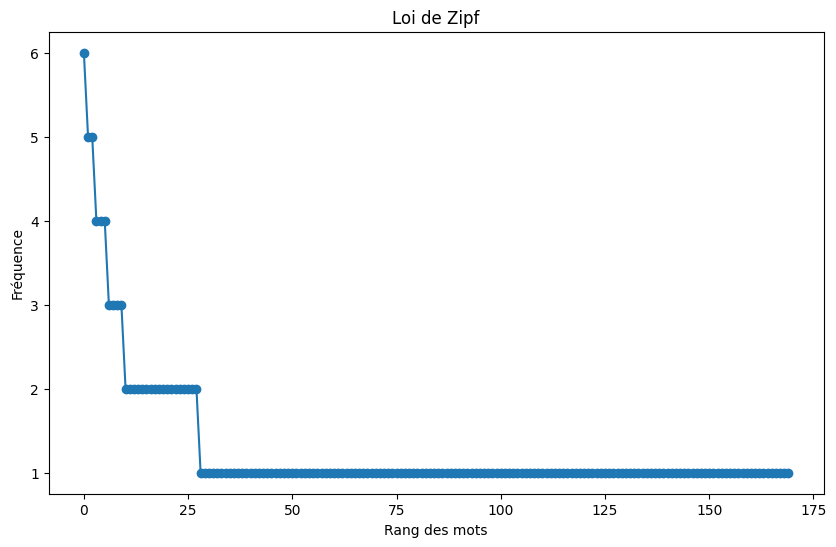

In [11]:
stop_words = set(stopwords.words("french"))
text = "Les conditions ne sont pas réunies pour l'instant pour une entrée de LR au gouvernement, a affirmé le ministre démissionnaire de l'Intérieur, Bruno Retailleau, mercredi 18 décembre, avant de rencontrer François Bayrou à 9h30. Le Premier ministre s'est rendu à l'Elysée à deux reprises, mardi, pour évoquer avec Emmanuel Macron la composition de sa future équipe. J'espère qu'on va réussir à aller vite et finaliser le gouvernement dans quelques jours, a-t-il affirmé en milieu d'après-midi. Le président des députés du MoDem, Marc Fesneau, très proche de François Bayrou, a évoqué, mercredi, sur TF1, des échanges très avancés et le besoin que les équipes puissent se constituer dans les ministères avant Noël. Suivez la journée politique dans notre direct. Le défilé des partis se poursuit à Matignon. François Bayrou poursuit ses consultations des groupes parlementaires, mercredi. Il doit recevoir des représentants du Parti radical à 11 heures et du parti UDR d'Eric Ciotti à midi, avant d'enchaîner sur les sénateurs du groupe macroniste à 14h30 et ceux du groupe centriste RDSE à 15h30.  Le RN agite la menace de la censure. Le vice-président du Rassemblement national Sébastien Chenu a menacé, mercredi, François Bayrou de censure tôt ou tard si ce dernier ne tient pas compte des erreurs qu'a pu commettre Michel Barnier, tant sur la forme que sur le fond dans la confection de son budget. La loi spéciale arrive au Sénat. Le texte budgétaire soumis en urgence après la censure du gouvernement Barnier entre dans sa dernière ligne droite au Parlement, avec un vote sans suspense attendu au Sénat. L'Assemblée nationale l'a adopté à l'unanimité, lundi, et, sauf immense surprise, à partir de 14h30, le Sénat l'approuvera à son tour sans le modifier, ce qui mettra fin à son parcours parlementaire et permettra sa promulgation in extremis avant le 31 décembre. François Bayrou promet de se rendre à Mayotte. Dès l'instant que le président de la République aura quitté [Mayotte], que le gouvernement sera formé, j'irai évidemment pour mobiliser la totalité des moyens de l'Etat, a assuré mardi soir le Premier ministre, critiqué pour avoir présidé lundi soir le conseil municipal de Pau après s'être contenté de suivre en visioconférence une réunion de crise sur Mayotte. Emmanuel Macron est attendu jeudi dans l'archipel."

tokens = word_tokenize(text.lower())
filtered_tokens = [w for w in tokens if w.isalnum() and w not in stop_words]   #Filtre

frequence = Counter(filtered_tokens)   #Création de la fréquence

sorted_frequencies = sorted(frequence.values(), reverse=True)    #Création des valeurs

plt.figure(figsize=(10, 6))
plt.plot(sorted_frequencies, marker="o")
plt.title("Loi de Zipf")
plt.xlabel("Rang des mots")
plt.ylabel("Fréquence")
plt.show()


Partie 2 :

In [12]:
stop_words = set(stopwords.words("french"))
text = "Les conditions ne sont pas réunies pour l'instant pour une entrée de LR au gouvernement, a affirmé le ministre démissionnaire de l'Intérieur, Bruno Retailleau, mercredi 18 décembre, avant de rencontrer François Bayrou à 9h30. Le Premier ministre s'est rendu à l'Elysée à deux reprises, mardi, pour évoquer avec Emmanuel Macron la composition de sa future équipe. J'espère qu'on va réussir à aller vite et finaliser le gouvernement dans quelques jours, a-t-il affirmé en milieu d'après-midi. Le président des députés du MoDem, Marc Fesneau, très proche de François Bayrou, a évoqué, mercredi, sur TF1, des échanges très avancés et le besoin que les équipes puissent se constituer dans les ministères avant Noël. Suivez la journée politique dans notre direct. Le défilé des partis se poursuit à Matignon. François Bayrou poursuit ses consultations des groupes parlementaires, mercredi. Il doit recevoir des représentants du Parti radical à 11 heures et du parti UDR d'Eric Ciotti à midi, avant d'enchaîner sur les sénateurs du groupe macroniste à 14h30 et ceux du groupe centriste RDSE à 15h30.  Le RN agite la menace de la censure. Le vice-président du Rassemblement national Sébastien Chenu a menacé, mercredi, François Bayrou de censure tôt ou tard si ce dernier ne tient pas compte des erreurs qu'a pu commettre Michel Barnier, tant sur la forme que sur le fond dans la confection de son budget. La loi spéciale arrive au Sénat. Le texte budgétaire soumis en urgence après la censure du gouvernement Barnier entre dans sa dernière ligne droite au Parlement, avec un vote sans suspense attendu au Sénat. L'Assemblée nationale l'a adopté à l'unanimité, lundi, et, sauf immense surprise, à partir de 14h30, le Sénat l'approuvera à son tour sans le modifier, ce qui mettra fin à son parcours parlementaire et permettra sa promulgation in extremis avant le 31 décembre. François Bayrou promet de se rendre à Mayotte. Dès l'instant que le président de la République aura quitté [Mayotte], que le gouvernement sera formé, j'irai évidemment pour mobiliser la totalité des moyens de l'Etat, a assuré mardi soir le Premier ministre, critiqué pour avoir présidé lundi soir le conseil municipal de Pau après s'être contenté de suivre en visioconférence une réunion de crise sur Mayotte. Emmanuel Macron est attendu jeudi dans l'archipel."

tokens = word_tokenize(text.lower())
filtered_tokens = [w for w in tokens if w.isalnum() and w not in stop_words]
bigrammes = list(bigrams(filtered_tokens))  #Création des bigrammes à partir des tokens
bigram_frequencies = Counter(bigrammes)
print(f"Bigrammes les plus fréquents : {bigram_frequencies.most_common(5)}")   #Renvoie les 5 plus fréquents

Bigrammes les plus fréquents : [(('françois', 'bayrou'), 5), (('premier', 'ministre'), 2), (('emmanuel', 'macron'), 2), (('conditions', 'réunies'), 1), (('réunies', 'entrée'), 1)]


Exercice 6 : Pipeline complet avec SpaCy

Partie 1 :

In [13]:
nlp = spacy.load("fr_core_news_sm")
nlp.add_pipe("find_dates")    #Ajout de find_date à la pipeline du npl
text = "Les conditions ne sont pas réunies pour l'instant pour une entrée de LR au gouvernement, a affirmé le ministre démissionnaire de l'Intérieur, Bruno Retailleau, mercredi 18 décembre, avant de rencontrer François Bayrou. Le Premier ministre s'est rendu à l'Elysée à deux reprises, mardi, pour évoquer avec Emmanuel Macron la composition de sa future équipe. J'espère qu'on va réussir à aller vite et finaliser le gouvernement dans quelques jours, a-t-il affirmé en milieu d'après-midi. Le président des députés du MoDem, Marc Fesneau, très proche de François Bayrou, a évoqué, mercredi, sur TF1, des échanges très avancés et le besoin que les équipes puissent se constituer dans les ministères avant Noël. Suivez la journée politique dans notre direct. Le défilé des partis se poursuit à Matignon. François Bayrou poursuit ses consultations des groupes parlementaires, mercredi. Il doit recevoir des représentants du Parti radical à 11 heures et du parti UDR d'Eric Ciotti à midi, avant d'enchaîner sur les sénateurs du groupe macroniste à 14h30 et ceux du groupe centriste RDSE à 15h30.  Le RN agite la menace de la censure. Le vice-président du Rassemblement national Sébastien Chenu a menacé, mercredi, François Bayrou de censure tôt ou tard si ce dernier ne tient pas compte des erreurs qu'a pu commettre Michel Barnier, tant sur la forme que sur le fond dans la confection de son budget. La loi spéciale arrive au Sénat. Le texte budgétaire soumis en urgence après la censure du gouvernement Barnier entre dans sa dernière ligne droite au Parlement, avec un vote sans suspense attendu au Sénat. L'Assemblée nationale l'a adopté à l'unanimité, lundi, et, sauf immense surprise, à partir de 14h30, le Sénat l'approuvera à son tour sans le modifier, ce qui mettra fin à son parcours parlementaire et permettra sa promulgation in extremis avant le 31 décembre. François Bayrou promet de se rendre à Mayotte. Dès l'instant que le président de la République aura quitté [Mayotte], que le gouvernement sera formé, j'irai évidemment pour mobiliser la totalité des moyens de l'Etat, a assuré mardi soir le Premier ministre, critiqué pour avoir présidé lundi soir le conseil municipal de Pau après s'être contenté de suivre en visioconférence une réunion de crise sur Mayotte. Emmanuel Macron est attendu jeudi dans l'archipel."
doc = nlp(text)
for sent in doc.sents:      #On boucle sur toutes les phrases
    Verbes=[]
    Noms=[]
    x=0
    for token in sent:
        if token.pos_ == "VERB":       #Si le token est un verbe, on le garde
            Verbes.append(token.text)
            x+=1
        elif token.pos_ == "PROPN":    #Si le token est un nom propre, on le garde
            Noms.append(token.text)
    for token in sent:
        if x==0 and token.pos_ == "AUX":   #S'il n'y a pas de verbe, on prend l'auxiliaire
            Verbes.append(token.text)
    print(f"Phrase : {sent.text} \nVerbes : {Verbes} \nNoms : {Noms}")
    Verbes=[]
    Noms=[]
    x=0

Phrase : Les conditions ne sont pas réunies pour l'instant pour une entrée de LR au gouvernement, a affirmé le ministre démissionnaire de l'Intérieur, Bruno Retailleau, mercredi 18 décembre, avant de rencontrer François Bayrou. 
Verbes : ['réunies', 'affirmé', 'rencontrer'] 
Noms : ['LR', 'Bruno', 'Retailleau', 'François', 'Bayrou']
Phrase : Le Premier ministre s'est rendu à l'Elysée à deux reprises, mardi, pour évoquer avec Emmanuel Macron la composition de sa future équipe. 
Verbes : ['rendu', 'évoquer'] 
Noms : ['Elysée', 'Emmanuel']
Phrase : J'espère qu'on va réussir à aller vite et finaliser le gouvernement dans quelques jours, a-t-il affirmé en milieu d'après-midi. 
Verbes : ['espère', 'va', 'réussir', 'aller', 'finaliser', 'affirmé'] 
Noms : []
Phrase : Le président des députés du MoDem, Marc Fesneau, très proche de François Bayrou, a évoqué, mercredi, sur TF1, des échanges très avancés et le besoin que les équipes puissent se constituer dans les ministères avant Noël. 
Verbes :

Partie 2 :

In [14]:
nlp = spacy.load("fr_core_news_sm")
nlp.add_pipe("find_dates")    #Ajout de find_date à la pipeline du npl
text = "Les conditions ne sont pas réunies pour l'instant pour une entrée de LR au gouvernement, a affirmé le ministre démissionnaire de l'Intérieur, Bruno Retailleau, mercredi 18 décembre, avant de rencontrer François Bayrou. Le Premier ministre s'est rendu à l'Elysée à deux reprises, mardi, pour évoquer avec Emmanuel Macron la composition de sa future équipe. J'espère qu'on va réussir à aller vite et finaliser le gouvernement dans quelques jours, a-t-il affirmé en milieu d'après-midi. Le président des députés du MoDem, Marc Fesneau, très proche de François Bayrou, a évoqué, mercredi, sur TF1, des échanges très avancés et le besoin que les équipes puissent se constituer dans les ministères avant Noël. Suivez la journée politique dans notre direct. Le défilé des partis se poursuit à Matignon. François Bayrou poursuit ses consultations des groupes parlementaires, mercredi. Il doit recevoir des représentants du Parti radical à 11 heures et du parti UDR d'Eric Ciotti à midi, avant d'enchaîner sur les sénateurs du groupe macroniste à 14h30 et ceux du groupe centriste RDSE à 15h30.  Le RN agite la menace de la censure. Le vice-président du Rassemblement national Sébastien Chenu a menacé, mercredi, François Bayrou de censure tôt ou tard si ce dernier ne tient pas compte des erreurs qu'a pu commettre Michel Barnier, tant sur la forme que sur le fond dans la confection de son budget. La loi spéciale arrive au Sénat. Le texte budgétaire soumis en urgence après la censure du gouvernement Barnier entre dans sa dernière ligne droite au Parlement, avec un vote sans suspense attendu au Sénat. L'Assemblée nationale l'a adopté à l'unanimité, lundi, et, sauf immense surprise, à partir de 14h30, le Sénat l'approuvera à son tour sans le modifier, ce qui mettra fin à son parcours parlementaire et permettra sa promulgation in extremis avant le 31 décembre. François Bayrou promet de se rendre à Mayotte. Dès l'instant que le président de la République aura quitté [Mayotte], que le gouvernement sera formé, j'irai évidemment pour mobiliser la totalité des moyens de l'Etat, a assuré mardi soir le Premier ministre, critiqué pour avoir présidé lundi soir le conseil municipal de Pau après s'être contenté de suivre en visioconférence une réunion de crise sur Mayotte. Emmanuel Macron est attendu jeudi dans l'archipel."
doc = nlp(text)
Dates=[]
Org=[]
Loc=[]
for sent in doc.ents:      #On boucle sur toutes les entités
    if sent.label_ == 'DATE':    #Si c'est une date, alors on la met dans la liste "Dates"
        Dates.append(sent.text)
    elif sent.label_ == 'ORG':            #Sinon, c'est une organisation et on la met alors dans "Org"
        Org.append(sent.text)
    elif sent.label_ == 'LOC':             #Si c'est un lieux, on la met dans "Loc"
        Loc.append(sent.text)
print(f"Dates : {Dates} \nOrganisations : {Org} \nLieux : {Loc}")
for sent in doc.sents:
    for token in sent:
        print(f"{token.text} → {token.lemma_} → {token.pos_} → {token.dep_} → {token.head.text}") #Récupération des informations des tokens

Dates : [] 
Organisations : ['Intérieur', 'MoDem', 'TF1', 'Parti radical', 'UDR', 'RDSE', 'RN', 'Rassemblement national Sébastien Chenu', 'Parlement', 'Sénat', 'Assemblée nationale'] 
Lieux : ['Elysée', 'Matignon', 'Mayotte', 'Mayotte', 'Etat', 'Pau', 'Mayotte']
Les → le → DET → det → conditions
conditions → condition → NOUN → nsubj → réunies
ne → ne → ADV → advmod → réunies
sont → être → AUX → aux:tense → réunies
pas → pas → ADV → advmod → réunies
réunies → réunir → VERB → ROOT → réunies
pour → pour → ADP → case → instant
l' → le → DET → det → instant
instant → instant → NOUN → obl:mod → réunies
pour → pour → ADP → case → entrée
une → un → DET → det → entrée
entrée → entrée → NOUN → obl:mod → réunies
de → de → ADP → case → LR
LR → LR → PROPN → nmod → entrée
au → au → ADP → case → gouvernement
gouvernement → gouvernement → NOUN → nmod → entrée
, → , → PUNCT → punct → réunies
a → avoir → AUX → aux:tense → affirmé
affirmé → affirmer → VERB → parataxis → réunies
le → le → DET → det → mini

Projet final

Partie 1 :

In [15]:
text_sc = "Elle apparaît surtout chez de jeunes adultes, entre 25 et 35 ans, et toucherait plus de 115 000 personnes en France, avec 5 000 nouveaux diagnostics réalisés chaque année. La sclérose en plaques (ou SEP) est une maladie inflammatoire, auto-immune et neurodégénérative qui affecte le cerveau et la moelle épinière. L’inflammation détruit la myéline, qui ne peut alors plus assurer son rôle de gaine protectrice pour les axones des neurones. Une perte qui affecte particulièrement la transmission de l’information transitant de cellules nerveuses en cellules nerveuses. Cette maladie chronique réduit les facultés motrices, visuelles, sensitives et cognitives, en fonction de la taille et de l’emplacement des lésions qu’elle inflige. Des soins existent pour limiter l’avancée de la pathologie, mais elle ne peut pas encore être guérie."
text_poli = "Le modérateur du débat, Benjamin Duhamel, intervient pour recadrer Julien Odoul : «Ce sont des choses qui sont inacceptables (...) Dans une discussion, on ne s’adresse pas à des personnes, a fortiori aux deux femmes qui sont sur ce plateau, en leur disant de se calmer.» Alors que Manon Aubry le remercie pour ce recadrage, l’élu RN reproche au journaliste d’avoir un «parti pris» et lui demande d’«arrêter» son «sketch». «On continue les invectives !», s’exclame le député MoDem Richard Ramos. «Voilà le vrai visage du RN...», soupire Mathieu Lefèvre, député Renaissance. Le calme revient sur le plateau. L’Insoumise recommande à Julien Odoul de se «faire tout petit». «La manière dont vous vous adressez aux femmes de ce pays est abjecte et insupportable. Vous ne savez pas laisser une femme finir sa phrase», s’indigne-t-elle. Julien Odoul lui coupe de nouveau la parole pour la qualifier de «féministe de pacotille». Une sonnerie vient mettre fin au débat et confirmer l’impression que cette séquence donne : celle d’une cour de récréation."
text_litt = "Les premières listes des principaux prix littéraires sont en train de tomber, et avec elles vient le lot de réactions scandalisées («Comment ont-ils pu oublier X?») teintées de snobisme («Sélectionner Y, c'est vraiment ranger les torchons avec les serviettes»). On se contentera ici de faire la remarque suivante: présent dans la première sélection du Renaudot mais pas dans celle du Goncourt, Cabane d'Abel Quentin doit absolument repartir avec au moins un prix prestigieux cette année, sinon c'est vraiment trop nul. Gaël Faye, présent sur ces deux listes, et Hélène Gaudy, toujours en lice pour le Goncourt, font partie de la sélection ci-dessous, truffée d'auteurs et autrices (notamment Marie Vingtras et Pierre Darkanian) qui auraient largement mérité d'obtenir au moins un accessit. Mais peut-être le jury du Femina ou les lycéens du Goncourt viendront-ils compenser ces oublis majeurs et donner à ces romans la visibilité qu'ils méritent."

#Créer un doc pour chaque texte
doc_sc = nlp(text_sc)
doc_poli = nlp(text_poli)       
doc_litt = nlp(text_litt)
stop_words = set(stopwords.words("french"))

#Filtrer chaque tokens récupérés de tous les textes
tokens_sc = word_tokenize(text_sc.lower())
filtered_tokens_sc = [w for w in tokens_sc if w.isalnum() and w not in stop_words]
frequ_sc=Counter(filtered_tokens_sc)
tokens_poli = word_tokenize(text_poli.lower())
filtered_tokens_poli = [w for w in tokens_poli if w.isalnum() and w not in stop_words]          
frequ_poli=Counter(filtered_tokens_poli)
tokens_litt = word_tokenize(text_litt.lower())
filtered_tokens_litt = [w for w in tokens_litt if w.isalnum() and w not in stop_words]
frequ_litt=Counter(filtered_tokens_litt)


print(f"Mots les plus fréquents pour la science : {frequ_sc.most_common(5)} \nMots les plus fréquents pour la politique : {frequ_poli.most_common(5)} \nMots les plus fréquents pour la littérature : {frequ_litt.most_common(5)}")         #Récupération des 5 mots les plus fréquents
for sent in doc_sc.sents:
    for token in sent:
        print(f"{token.text} → {token.lemma_} → {token.pos_} → {token.dep_} → {token.head.text}")       #Récupération des syntaxes

Mots les plus fréquents pour la science : [('plus', 2), ('000', 2), ('maladie', 2), ('affecte', 2), ('peut', 2)] 
Mots les plus fréquents pour la politique : [('julien', 3), ('odoul', 3), ('débat', 2), ('femmes', 2), ('plateau', 2)] 
Mots les plus fréquents pour la littérature : [('goncourt', 3), ('listes', 2), ('prix', 2), ('vraiment', 2), ('présent', 2)]
Elle → lui → PRON → nsubj → apparaît
apparaît → apparaître → VERB → ROOT → apparaît
surtout → surtout → ADV → advmod → apparaît
chez → chez → ADP → case → adultes
de → de → DET → det → adultes
jeunes → jeune → ADJ → amod → adultes
adultes → adulte → NOUN → obl:mod → apparaît
, → , → PUNCT → punct → apparaît
entre → entrer → ADP → case → 25
25 → 25 → NUM → obl:mod → apparaît
et → et → CCONJ → cc → ans
35 → 35 → NUM → nummod → ans
ans → an → NOUN → conj → 25
, → , → PUNCT → punct → 25
et → et → CCONJ → cc → toucherait
toucherait → toucher → VERB → conj → apparaît
plus → plus → ADV → advmod → 115
de → de → ADP → fixed → plus
115 → 115 →

Partie 2 :

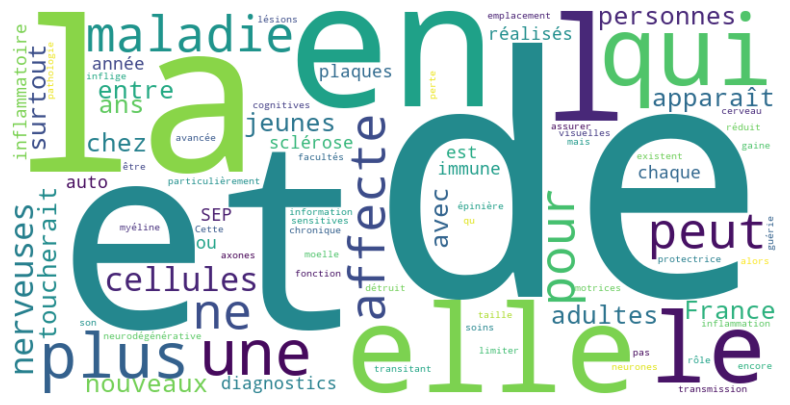

: 

In [ ]:
nlp = spacy.load("fr_core_news_sm")
text = "Elle apparaît surtout chez de jeunes adultes, entre 25 et 35 ans, et toucherait plus de 115 000 personnes en France, avec 5 000 nouveaux diagnostics réalisés chaque année. La sclérose en plaques (ou SEP) est une maladie inflammatoire, auto-immune et neurodégénérative qui affecte le cerveau et la moelle épinière. L’inflammation détruit la myéline, qui ne peut alors plus assurer son rôle de gaine protectrice pour les axones des neurones. Une perte qui affecte particulièrement la transmission de l’information transitant de cellules nerveuses en cellules nerveuses. Cette maladie chronique réduit les facultés motrices, visuelles, sensitives et cognitives, en fonction de la taille et de l’emplacement des lésions qu’elle inflige. Des soins existent pour limiter l’avancée de la pathologie, mais elle ne peut pas encore être guérie."
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)       #Création des mots

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')         #Paramètres d'affichage
plt.axis('off')
plt.show()

options = {"compact": True, "color": "red", "bg": "white"}   #Options du displacy
displacy.render(doc,style='dep', options=options)


Partie 3 :

In [17]:
nlp = spacy.load("fr_core_news_sm")
text = "Elle apparaît surtout chez de jeunes adultes, entre 25 et 35 ans, et toucherait plus de 115 000 personnes en France, avec 5 000 nouveaux diagnostics réalisés chaque année. La sclérose en plaques (ou SEP) est une maladie inflammatoire, auto-immune et neurodégénérative qui affecte le cerveau et la moelle épinière. L’inflammation détruit la myéline, qui ne peut alors plus assurer son rôle de gaine protectrice pour les axones des neurones. Une perte qui affecte particulièrement la transmission de l’information transitant de cellules nerveuses en cellules nerveuses. Cette maladie chronique réduit les facultés motrices, visuelles, sensitives et cognitives, en fonction de la taille et de l’emplacement des lésions qu’elle inflige. Des soins existent pour limiter l’avancée de la pathologie, mais elle ne peut pas encore être guérie."
doc = nlp(text)
L=[]
for ent in doc.ents:
     L.append(ent.label_)       #Récupération des types d'entités
print(Counter(L))
tokens = word_tokenize(text)   #Création des tokens
tag_tokens = pos_tag(tokens)   #Récupére les types
tree = ne_chunk(tag_tokens)    #Création de groupes avec les même types
L2=[]
for subtree in tree:        #Extraction des types d'entités
    if isinstance(subtree, nltk.Tree):
        L2.append(subtree.label())
print(Counter(L2))          #Création des fréquences

Counter({'LOC': 2, 'ORG': 1, 'MISC': 1})
Counter({'GPE': 2, 'ORGANIZATION': 1, 'PERSON': 1})


Ainsi, LOC = GPE, ORG = ORGANIZATION et MISC = PERSON